# NBA Power and Influence

In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

In [3]:
attendance_df = pd.read_csv("C:\\Users\\ASUS\\Desktop\\NBA\data\\Attendance.csv");attendance_df.head()

,TEAM,GMS,PCT,TOTAL_MILLIONS,AVG_MILLIONS
0,Chicago Bulls,41,104,0.888882,0.021680
1,Dallas Mavericks,41,103,0.811366,0.019789
2,Sacramento Kings,41,101,0.721928,0.017608
3,Miami Heat,41,100,0.805400,0.019643
4,Toronto Raptors,41,100,0.813050,0.019830


In [4]:
endorsements_df = pd.read_csv("C:\\Users\\ASUS\\Desktop\\NBA\data\\endorsements.csv");endorsements_df.head()

,NAME,TEAM,SALARY_MILLIONS,ENDORSEMENT_MILLIONS
0,LeBron James,Cleveland Cavaliers,31,55
1,Kevin Durant,Golden State Warriors,27,36
2,Stephen Curry,Golden State Warriors,12,35
3,James Harden,Houston Rockets,27,20
4,Russell Westbrook,Oklahoma City Thunder,27,15


In [5]:
team_valuations_df = pd.read_csv("C:\\Users\\ASUS\\Desktop\\NBA\data\\team_valuations.csv");team_valuations_df.head()

,TEAM,VALUE_MILLIONS
0,New York Knicks,3300.0
1,Los Angeles Lakers,3000.0
2,Golden State Warriors,2600.0
3,Chicago Bulls,2500.0
4,Boston Celtics,2200.0


In [6]:
salary_df = pd.read_csv("C:\\Users\\ASUS\\Desktop\\NBA\data\\salary.csv");salary_df.head()

,NAME,POSITION,TEAM,SALARY
0,LeBron James,SF,Cleveland Cavaliers,30963450.0
1,Mike Conley,PG,Memphis Grizzlies,26540100.0
2,Al Horford,C,Boston Celtics,26540100.0
3,Dirk Nowitzki,PF,Dallas Mavericks,25000000.0
4,Carmelo Anthony,SF,New York Knicks,24559380.0


In [7]:
plus_minus_df = pd.read_csv("C:\\Users\\ASUS\\Desktop\\NBA\data\\real_plus_minus.csv");plus_minus_df.head()

,NAME,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS
0,"LeBron James, SF",CLE,74,37.8,6.49,1.93,8.42,20.43
1,"Stephen Curry, PG",GS,79,33.4,7.27,0.14,7.41,18.80
2,"Jimmy Butler, SG",CHI,76,37.0,4.82,1.80,6.62,17.35
3,"Russell Westbrook, PG",OKC,81,34.6,6.74,-0.47,6.27,17.34
4,"Draymond Green, PF",GS,76,32.5,1.55,5.59,7.14,16.84


In [8]:
br_df = pd.read_csv("C:\\Users\\ASUS\\Desktop\\NBA\data\\br.csv");br_df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
0,1,Russell Westbrook,PG,28,OKC,81,81,34.6,10.2,24.0,...,0.845,1.7,9.0,10.7,10.4,1.6,0.4,5.4,2.3,31.6
1,2,James Harden,PG,27,HOU,81,81,36.4,8.3,18.9,...,0.847,1.2,7.0,8.1,11.2,1.5,0.5,5.7,2.7,29.1
2,3,Isaiah Thomas,PG,27,BOS,76,76,33.8,9.0,19.4,...,0.909,0.6,2.1,2.7,5.9,0.9,0.2,2.8,2.2,28.9
3,4,Anthony Davis,C,23,NOP,75,75,36.1,10.3,20.3,...,0.802,2.3,9.5,11.8,2.1,1.3,2.2,2.4,2.2,28.0
4,5,DeMar DeRozan,SG,27,TOR,74,74,35.4,9.7,20.9,...,0.842,0.9,4.3,5.2,3.9,1.1,0.2,2.4,1.8,27.3


In [9]:
elo_df = pd.read_csv("C:\\Users\\ASUS\\Desktop\\NBA\data\\elo.csv");elo_df.head()

,ELO,TEAM,CONF
0,1770,Golden State Warriors,West
1,1661,San Antonio Spurs,West
2,1636,Los Angeles Clippers,West
3,1617,Utah Jazz,West
4,1602,Houston Rockets,West


In [10]:
attendance_valuation_df=\
attendance_df.merge(team_valuations_df,how="inner",on="TEAM")
attendance_valuation_df.head()

,TEAM,GMS,PCT,TOTAL_MILLIONS,AVG_MILLIONS,VALUE_MILLIONS
0,Chicago Bulls,41,104,0.888882,0.021680,2500.0
1,Dallas Mavericks,41,103,0.811366,0.019789,1450.0
2,Sacramento Kings,41,101,0.721928,0.017608,1075.0
3,Miami Heat,41,100,0.805400,0.019643,1350.0
4,Toronto Raptors,41,100,0.813050,0.019830,1125.0


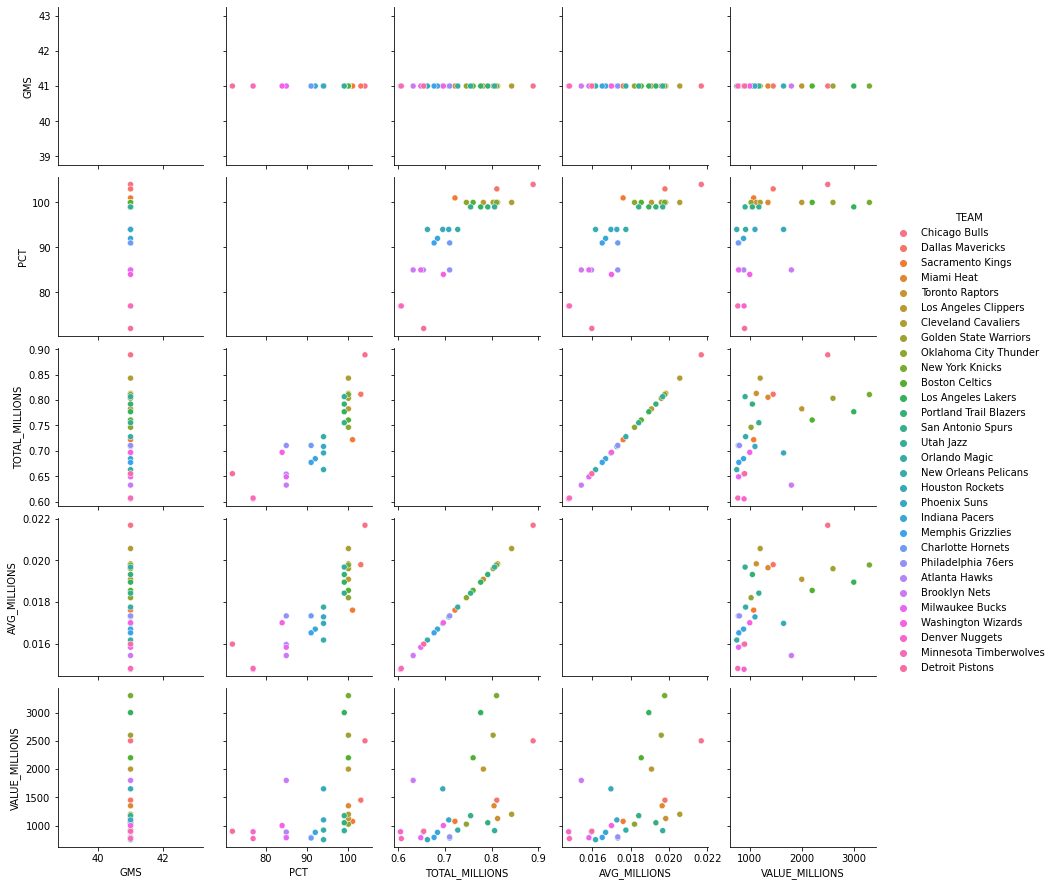

In [11]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"));sns.pairplot(attendance_valuation_df, hue="TEAM")

<AxesSubplot:>

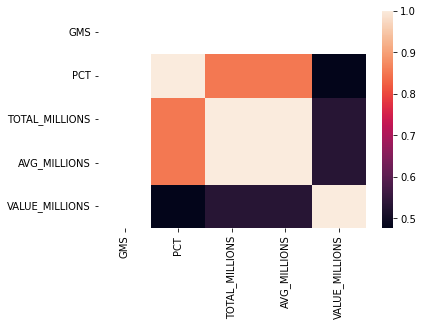

In [12]:
corr = attendance_valuation_df.corr()
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)

In [13]:
valuations = attendance_valuation_df.pivot("TEAM", "AVG_MILLIONS", "VALUE_MILLIONS")

<AxesSubplot:title={'center':'NBA Team AVG Attendance vs Valuation in Millions:  2016-2017 Season'}, xlabel='AVG_MILLIONS', ylabel='TEAM'>

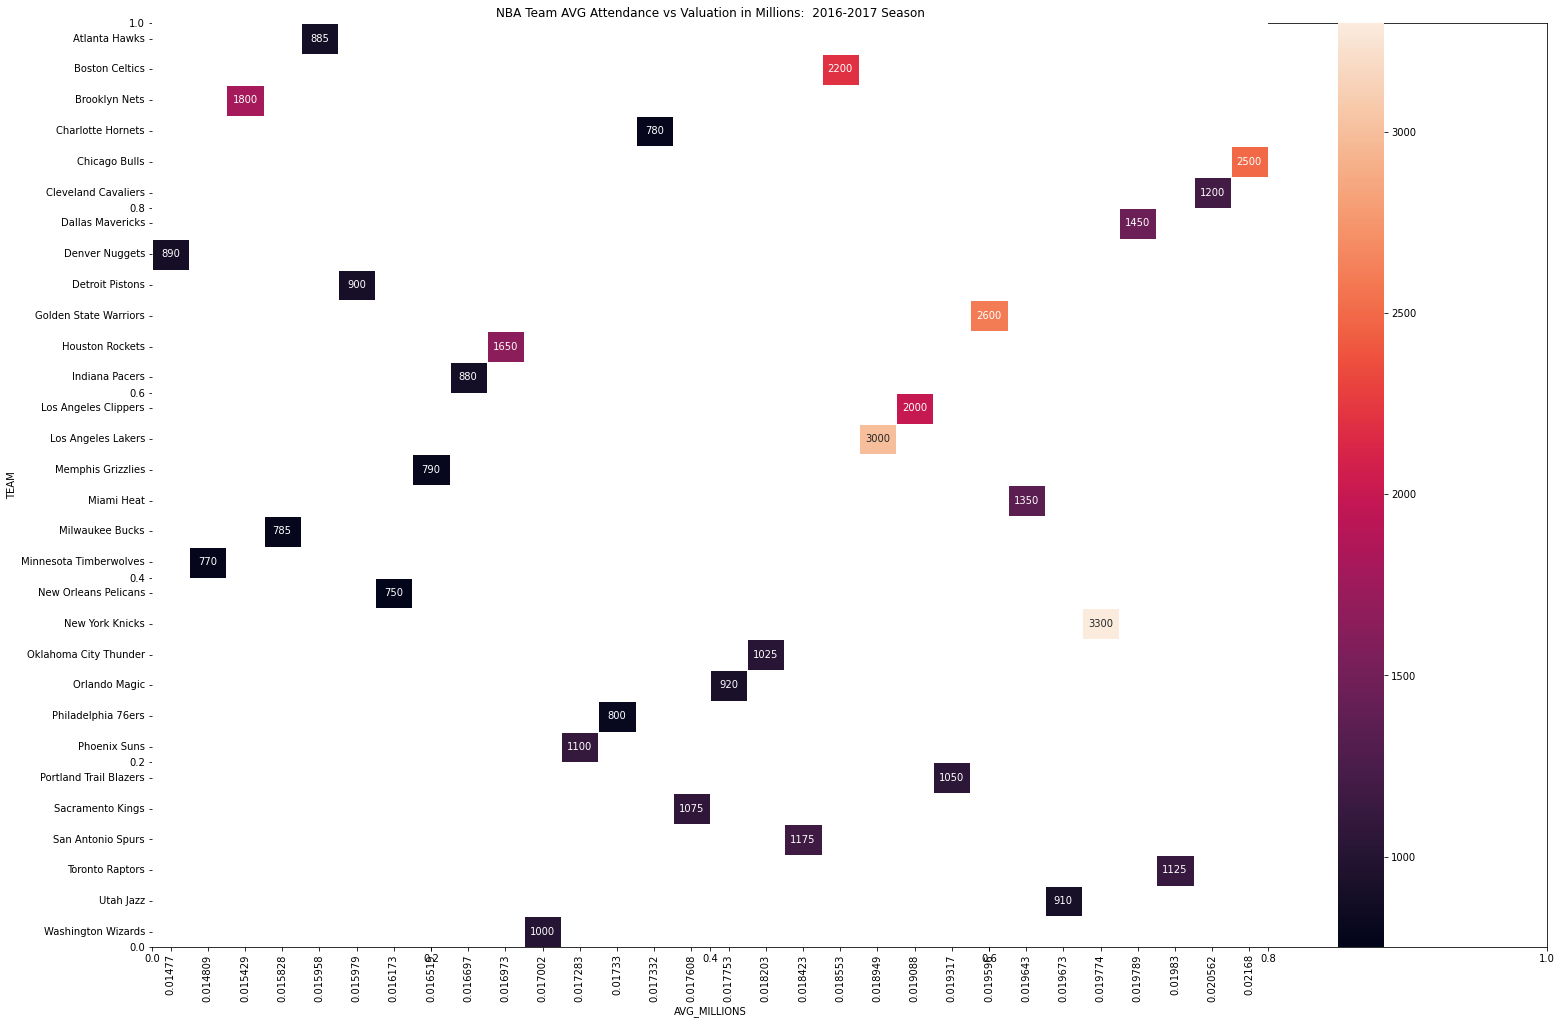

In [14]:
plt.subplots(figsize=(25,17))
ax = plt.axes()
ax.set_title("NBA Team AVG Attendance vs Valuation in Millions:  2016-2017 Season")
sns.heatmap(valuations,linewidths=.5, annot=True, fmt='g')

In [16]:
results = smf.ols('VALUE_MILLIONS ~AVG_MILLIONS', data=attendance_valuation_df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         VALUE_MILLIONS   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     10.98
Date:                Mon, 20 Sep 2021   Prob (F-statistic):            0.00255
Time:                        22:11:07   Log-Likelihood:                -234.04
No. Observations:                  30   AIC:                             472.1
Df Residuals:                      28   BIC:                             474.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2408.0155   1141.235     -2.110   

<AxesSubplot:xlabel='AVG_MILLIONS', ylabel='VALUE_MILLIONS'>

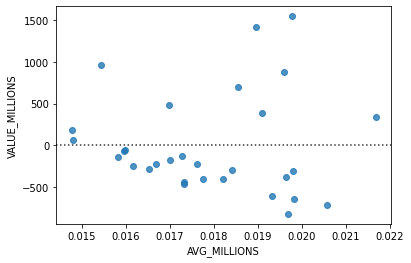

In [17]:
sns.residplot(y="VALUE_MILLIONS", x="AVG_MILLIONS", data=attendance_valuation_df)

In [18]:
attendance_valuation_elo_df = attendance_valuation_df.merge(elo_df, how="inner", on="TEAM")
attendance_valuation_elo_df.head()

,TEAM,GMS,PCT,TOTAL_MILLIONS,AVG_MILLIONS,VALUE_MILLIONS,ELO,CONF
0,Chicago Bulls,41,104,0.888882,0.021680,2500.0,1519,East
1,Dallas Mavericks,41,103,0.811366,0.019789,1450.0,1420,West
2,Sacramento Kings,41,101,0.721928,0.017608,1075.0,1393,West
3,Miami Heat,41,100,0.805400,0.019643,1350.0,1569,East
4,Toronto Raptors,41,100,0.813050,0.019830,1125.0,1600,East
